In [2]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt



In [ ]:


df = pd.read_stata('APPLE.DTA')

In [4]:
df.describe

<bound method NDFrame.describe of         id  educ    date state  regprc  ecoprc  inseason  hhsize  male  \
0    10002    16  111597    SD    1.19    1.19         1       4     0   
1    10004    16  121897    KS    0.59    0.79         0       1     0   
2    10034    18  111097    MI    0.59    0.99         1       3     0   
3    10035    12  111597    TN    0.89    1.09         1       2     1   
4    10039    15  122997    NY    0.89    1.09         0       1     1   
..     ...   ...     ...   ...     ...     ...       ...     ...   ...   
655  13892    14   20298    MD    0.59    0.59         0       5     0   
656  13893    16   20398    OH    0.59    0.59         0       4     0   
657  13908    16   20398    IN    0.89    1.09         0       2     0   
658  13916    12   20298    NY    0.59    0.59         0       1     0   
659  13921    18   20798    MA    1.19    1.39         0       3     1   

     faminc  age    reglbs    ecolbs  numlt5  num5_17  num18_64  numgt64  
0 

In [5]:
df.columns

Index(['id', 'educ', 'date', 'state', 'regprc', 'ecoprc', 'inseason', 'hhsize',
       'male', 'faminc', 'age', 'reglbs', 'ecolbs', 'numlt5', 'num5_17',
       'num18_64', 'numgt64'],
      dtype='object')

In [6]:
df.groupby('male')[['ecoprc','ecolbs']].describe()

ecoprc                                                   ecolbs  \
      count      mean       std   min   25%   50%   75%   max  count   
male                                                                   
0     487.0  1.092875  0.297161  0.59  0.89  1.09  1.29  1.59  487.0   
1     173.0  1.049538  0.289514  0.59  0.79  1.09  1.29  1.59  173.0   

                                                    
          mean       std  min  25%  50%  75%   max  
male                                                
0     1.476728  2.502953  0.0  0.0  1.0  2.0  42.0  
1     1.466281  2.596333  0.0  0.0  1.0  2.0  21.0

In [7]:
df.groupby('male')[['regprc','reglbs']].describe()

regprc                                                   reglbs  \
      count      mean       std   min   25%   50%   75%   max  count   
male                                                                   
0     487.0  0.883840  0.244871  0.59  0.59  0.89  1.19  1.19  487.0   
1     173.0  0.879595  0.244013  0.59  0.59  0.89  1.19  1.19  173.0   

                                                         
          mean       std  min  25%       50%  75%   max  
male                                                     
0     1.220739  2.654989  0.0  0.0  0.000000  2.0  42.0  
1     1.455684  3.533153  0.0  0.0  0.666667  2.0  42.0

In [8]:
#Pulling data from stata which doesnt fit in Pandas df

reader = pd.io.stata.StataReader('APPLE.DTA')

variable_descriptions = reader.variable_labels()

pprint.pprint(variable_descriptions)

{'age': 'in years',
 'date': 'date:  month/day/year',
 'ecolbs': 'quantity ecolabeled apples, lbs',
 'ecoprc': 'price of ecolabeled apples',
 'educ': 'years schooling',
 'faminc': 'family income, thousands',
 'hhsize': 'household size',
 'id': 'respondent identifier',
 'inseason': '=1 if interviewed in Nov.',
 'male': '=1 if male',
 'num18_64': '# in household 18 to 64',
 'num5_17': '# in household 5 to 17',
 'numgt64': '# in household older than 64',
 'numlt5': '# in household younger than 5',
 'reglbs': 'quantity regular apples, pounds',
 'regprc': 'price of regular apples',
 'state': 'home state'}


In [9]:

df['income'] = (df['reglbs'] * df['regprc']) + (df['ecolbs'] * df['ecoprc'])

incomedf= df[['reglbs', 'regprc', 'ecolbs', 'ecoprc', 'income']]
incomedf.corr()




,reglbs,regprc,ecolbs,ecoprc,income
reglbs,1.000000,-0.057797,-0.163024,-0.020411,0.528228
regprc,-0.057797,1.000000,0.008663,0.830759,0.161439
ecolbs,-0.163024,0.008663,1.000000,-0.098912,0.698252
ecoprc,-0.020411,0.830759,-0.098912,1.000000,0.104978
income,0.528228,0.161439,0.698252,0.104978,1.000000


(array([649.,   8.,   0.,   2.,   0.,   1.]),
 array([ 0.,  7., 14., 21., 28., 35., 42.]),
 <BarContainer object of 6 artists>)

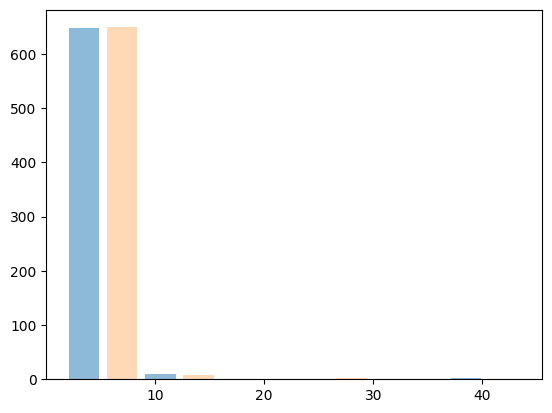

In [16]:
plt.hist(df.reglbs,bins=6, alpha = .5, rwidth = .4)
plt.hist(df.ecolbs,bins=6, alpha = .3, rwidth = .4, align = 'right')

(array([431., 169.,  45.,   1.,   2.,   6.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 ]),
 <BarContainer object of 6 artists>)

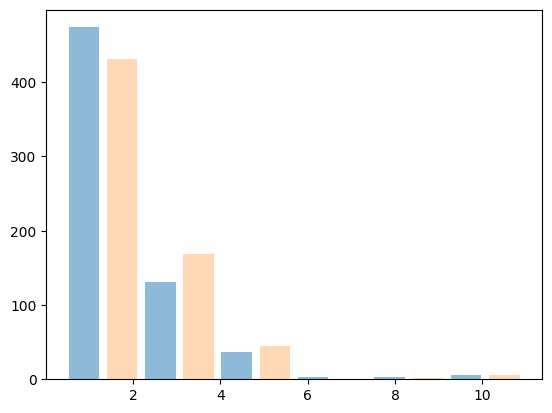

In [19]:
filterdf = df[(df.reglbs<20) & (df.ecolbs<20)]
plt.hist(filterdf.reglbs,bins=6, alpha = .5, rwidth = .4)
plt.hist(filterdf.ecolbs,bins=6, alpha = .3, rwidth = .4, align = 'right')

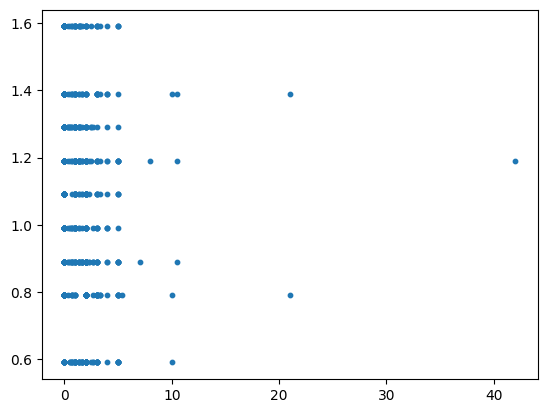

In [23]:
plt.scatter(df.ecolbs,df.ecoprc,s=10)